<a href="https://colab.research.google.com/github/ShabnaIlmi/Bank-Marketing-System/blob/main/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


# **Installing the relevant libraries**

# **Importing the necessary libraries**

In [166]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import validate_data
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colormaps
from matplotlib.ticker import FuncFormatter, LogLocator
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the dataset**

In [172]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_csv('/content/drive/MyDrive/Bank-Marketing-Random-Forest-and-Neural-Networks/bank-additional-full.csv', delimiter=';')

In [173]:
# Displaying the data contained within the dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Data Analyzation**

In [174]:
# Displaying dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

### **Identifying Categorical and Numerical Features**

In [175]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

### **Categorical Features**

In [176]:
# Displaying the categorical features
print("\nCategorical Features:\n")
print(categorical_cols)


Categorical Features:

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


**Unique values and their counts relevant to each categorical column**

In [177]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
 
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
 
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
 
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
 
loan
no         33950
yes         6248
unknown      990
Name: count, dty

**Columns with 'unknown' values with their counts**

In [178]:
# Displaying the total count of missing values and the respective categorical columns

# Creating an empty list
unknown_values = []

# Checking for 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    if unknown_count > 0:
        unknown_values.append({'Column': col, 'Count': unknown_count})

In [179]:
# Converting the list into a pandas DataFrame
unknown_values_df = (
    pd.DataFrame(unknown_values)
    .sort_values(by='Count', ascending=False)
    .reset_index(drop=True)
)

In [180]:
# Displaying the DataFrame
print("\nColumns with 'unknown' values and their counts:")
print()
print(unknown_values_df)


Columns with 'unknown' values and their counts:

      Column  Count
0    default   8597
1  education   1731
2    housing    990
3       loan    990
4        job    330
5    marital     80


**Unique values and their counts relevant to each column containing 'unknown' values**

In [181]:
# Displaying the unique values and their counts relevant to each column containing "unknown" values
print("Unique values and their counts relevant to each column containing 'unknown' values:\n")
for _, row in unknown_values_df.iterrows():
    col = row['Column']
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their counts relevant to each column containing 'unknown' values:

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
 
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
 
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
 
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64
 
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
 
marital
married     24928
single      11568
divorced     4612
unknown        80

### **Numerical Features**


In [182]:
# Numerical features
print("\nNumerical Features:\n")
print(numerical_cols)


Numerical Features:

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


**Unique values and their counts in the numerical columns**

In [183]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_cols:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64
 
duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64
 
campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64
 
pdays
999    39673
3        439
6        412
4        

### **Visualization of the Target Variable**

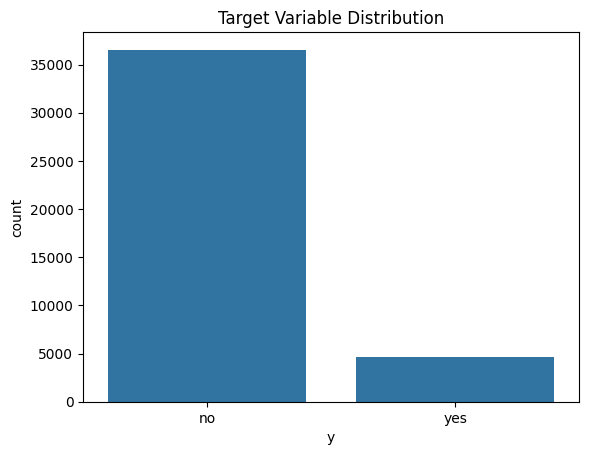

In [184]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='y')
plt.title('Target Variable Distribution')
plt.show()

### **Visualizing the Correlation Heatmap**

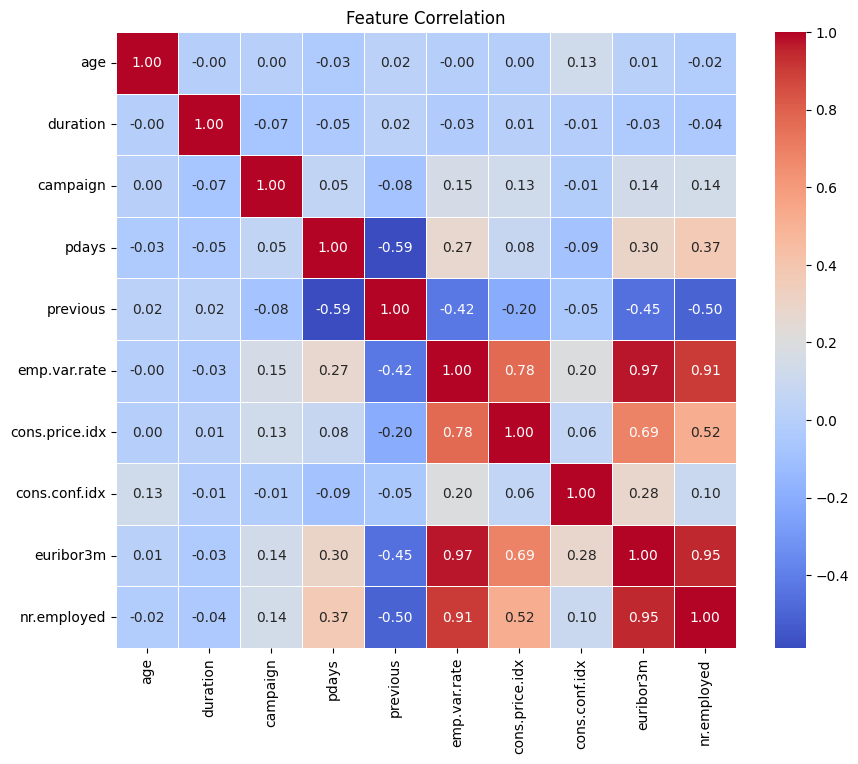

In [185]:
# Selecting the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix
corr = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation')
plt.show()

### **Visualizing the Distribution of the Categorical Columns**

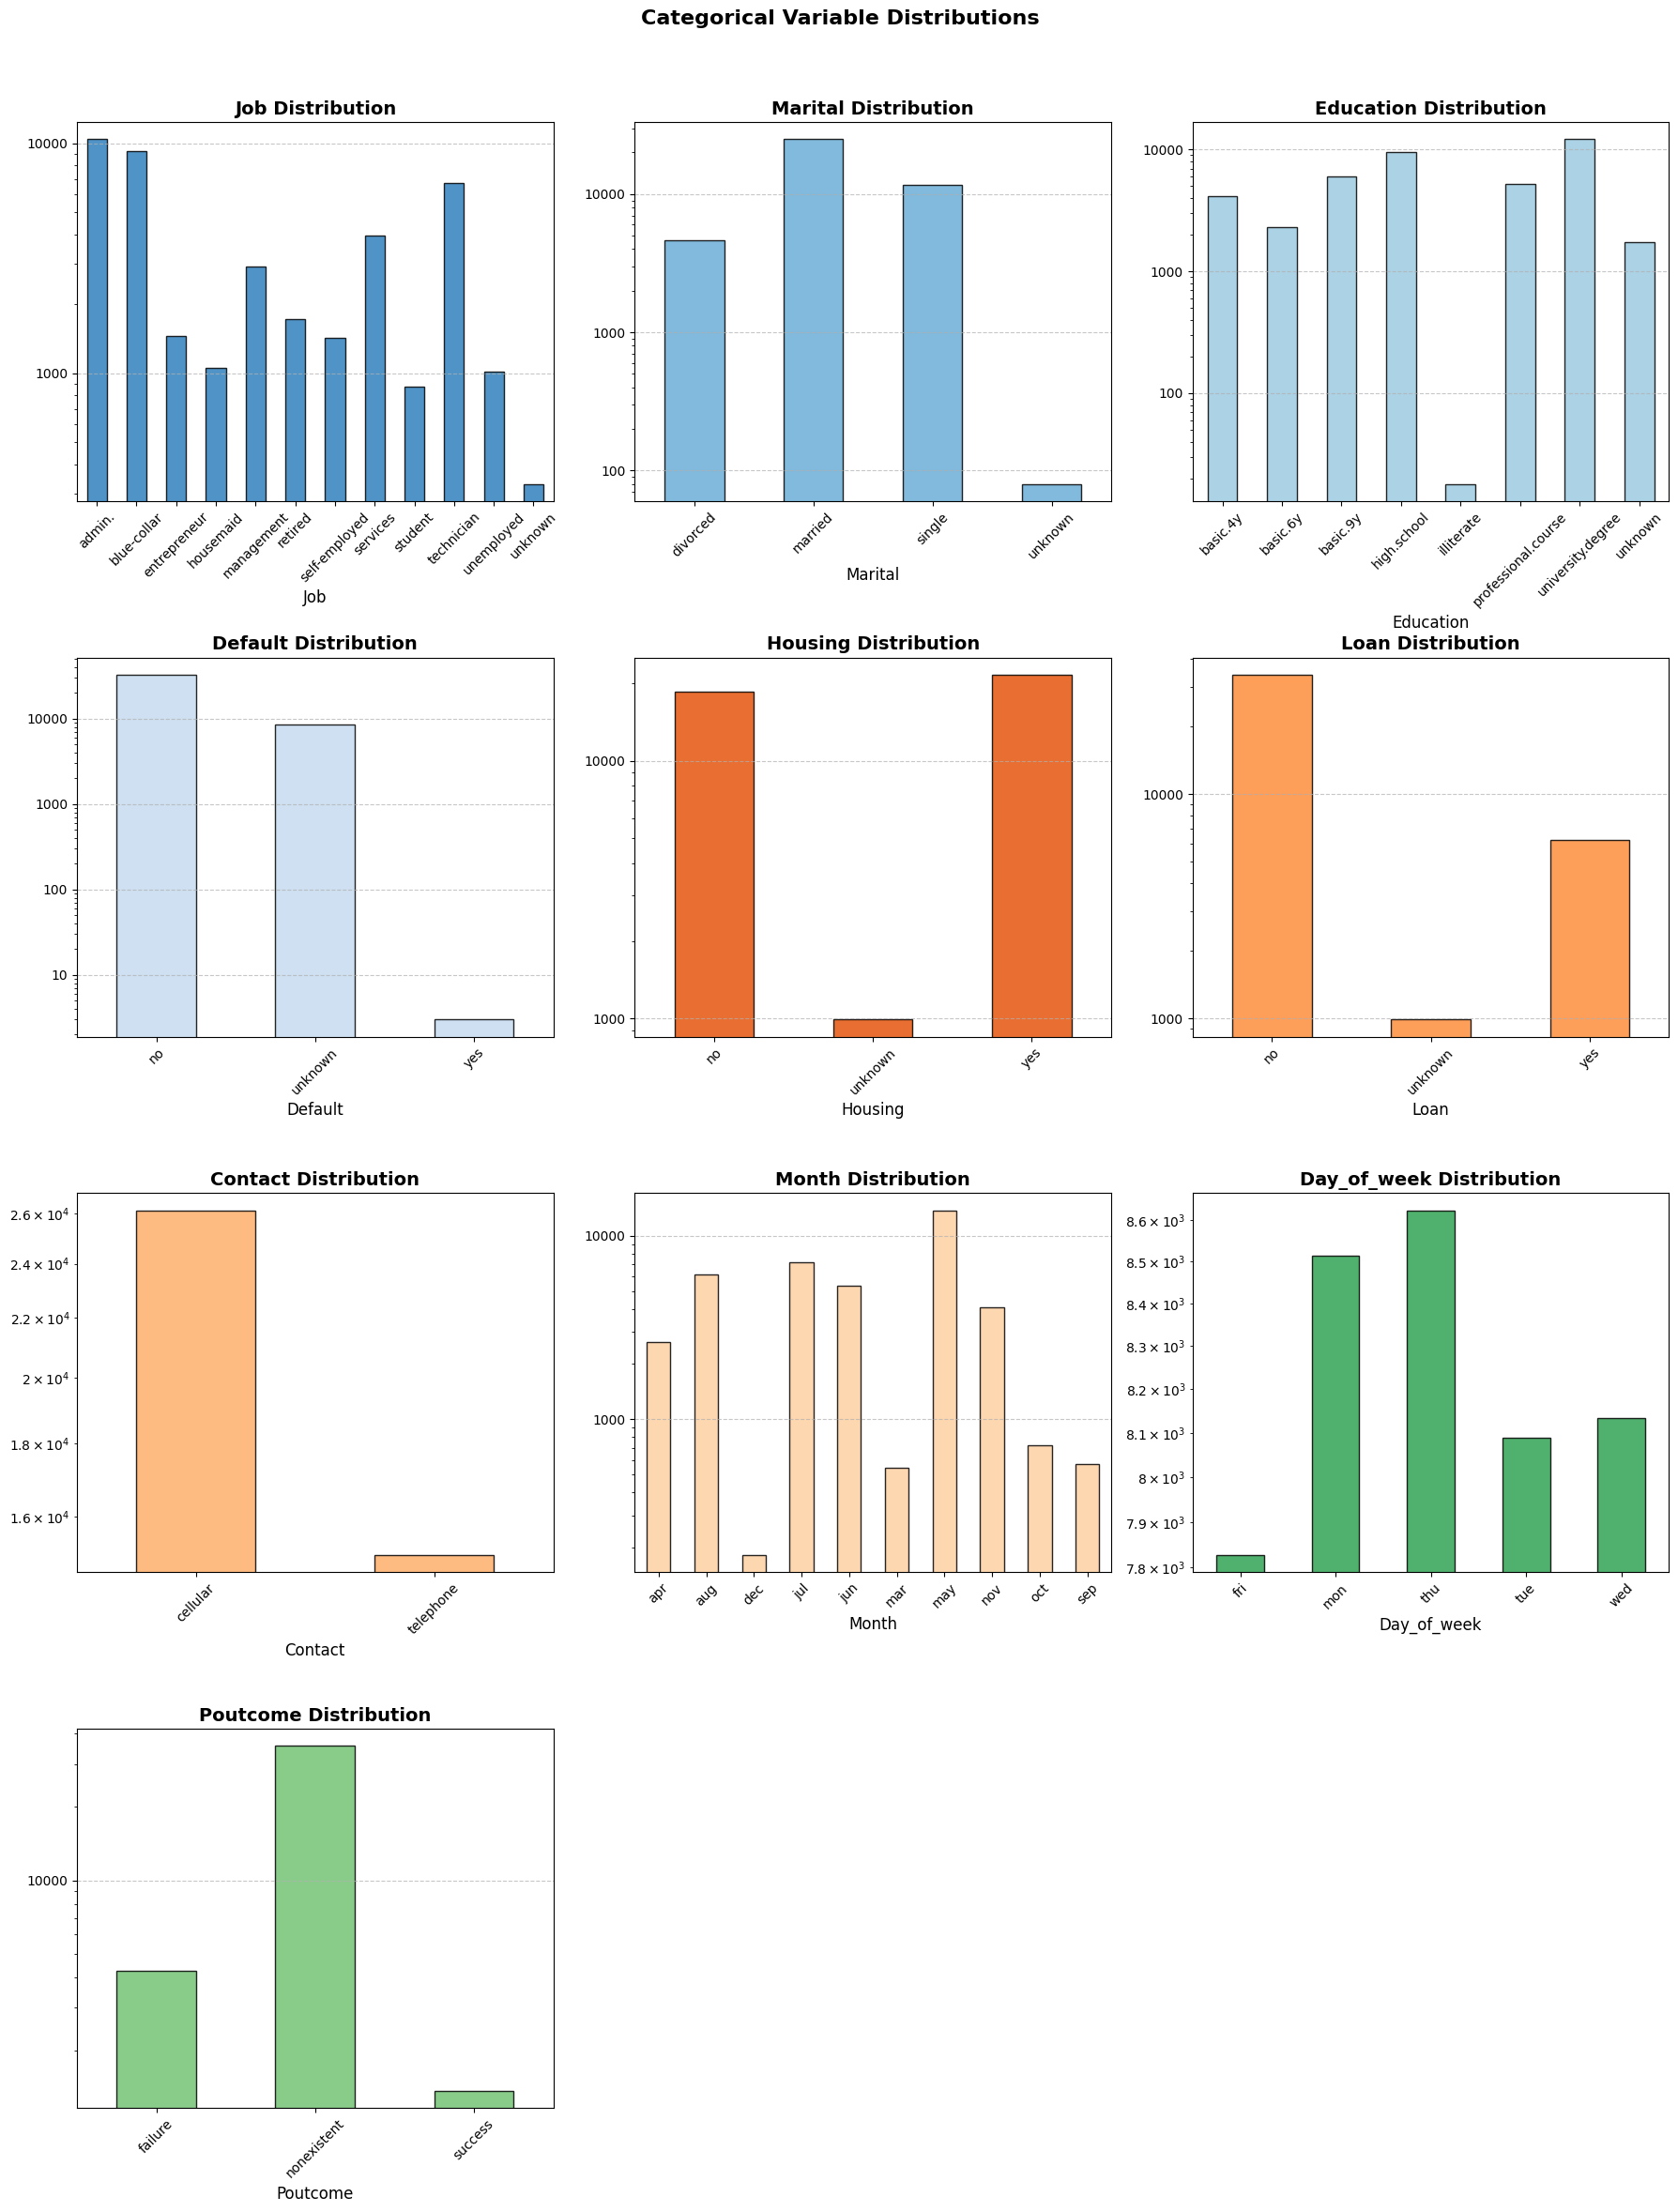

In [186]:
# Defining a list to store the categorical variables
categorical_distribution = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                             'month', 'day_of_week', 'poutcome']

# Defining grid dimensions
n_cols = 3
n_rows = (len(categorical_distribution) + n_cols - 1) // n_cols

# Creating subplots with improved styling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Generating a color palette using the new colormap approach
colors = plt.colormaps['tab20c'](range(len(categorical_distribution)))  # Fetch colors for each category

# Plotting each categorical column
for idx, column in enumerate(categorical_distribution):
    data[column].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color=colors[idx % len(colors)],
                                                  alpha=0.85, edgecolor='black')
    axes[idx].set_title(f'{column.capitalize()} Distribution', fontsize=14, weight='bold')
    axes[idx].set_xlabel(column.capitalize(), fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', left=True, labelleft=True)  # Ensure y-axis ticks and labels are visible
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

    # Applying log scale to y-axis
    axes[idx].set_yscale('log')

    # Customizing y-axis ticks for log scale
    axes[idx].yaxis.set_major_locator(LogLocator(base=10.0))  # Major ticks for powers of 10
    axes[idx].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}'))  # Format tick labels as integers

# Turn off unused axes
for ax in axes[len(categorical_distribution):]:
    ax.axis('off')

# Displaying the plot
plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle('Categorical Variable Distributions', fontsize=16, weight='bold')

plt.show()

### **Visualizing the Distribution of the Numerical Columns**

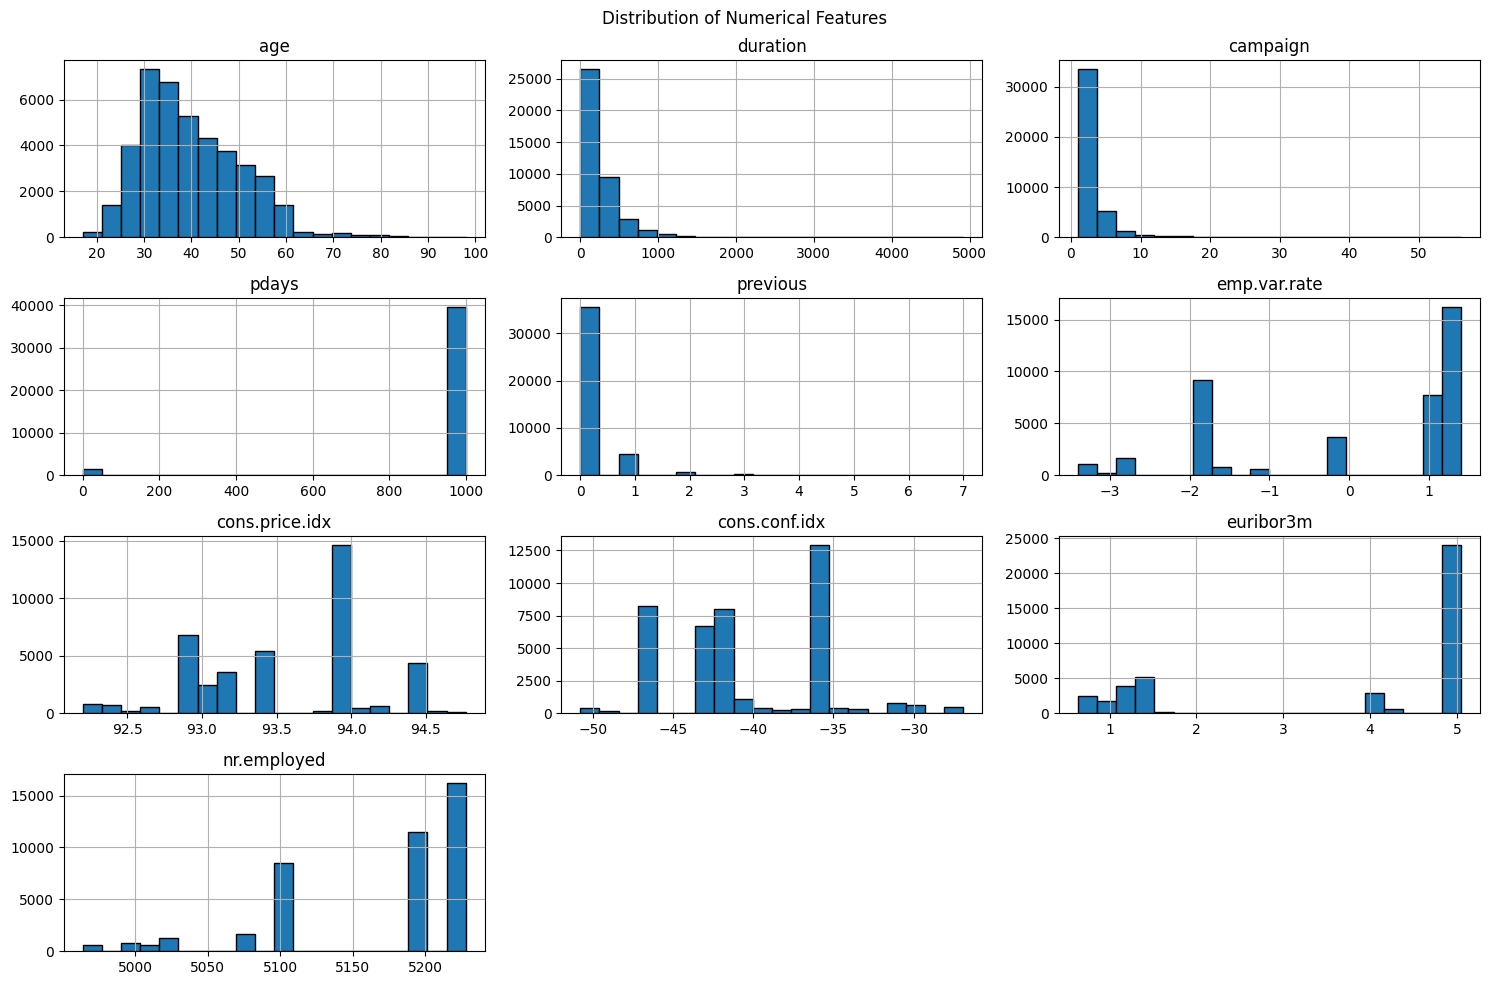

In [187]:
# Visualizing the distribution of numerical columns

# Selecting numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for all numerical columns
data[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

### **Outlier Analysis**




In [188]:
# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in numerical_cols:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, "
          f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")

Column: age
  Outliers: 469, Lower: 9.50, Upper: 69.50
 
Column: duration
  Outliers: 2963, Lower: -223.50, Upper: 644.50
 
Column: campaign
  Outliers: 2406, Lower: -2.00, Upper: 6.00
 
Column: pdays
  Outliers: 1515, Lower: 999.00, Upper: 999.00
 
Column: previous
  Outliers: 5625, Lower: 0.00, Upper: 0.00
 
Column: emp.var.rate
  Outliers: 0, Lower: -6.60, Upper: 6.20
 
Column: cons.price.idx
  Outliers: 0, Lower: 91.70, Upper: 95.37
 
Column: cons.conf.idx
  Outliers: 447, Lower: -52.15, Upper: -26.95
 
Column: euribor3m
  Outliers: 0, Lower: -4.08, Upper: 10.39
 
Column: nr.employed
  Outliers: 0, Lower: 4905.60, Upper: 5421.60
 


### **Visualizing the Outliers**

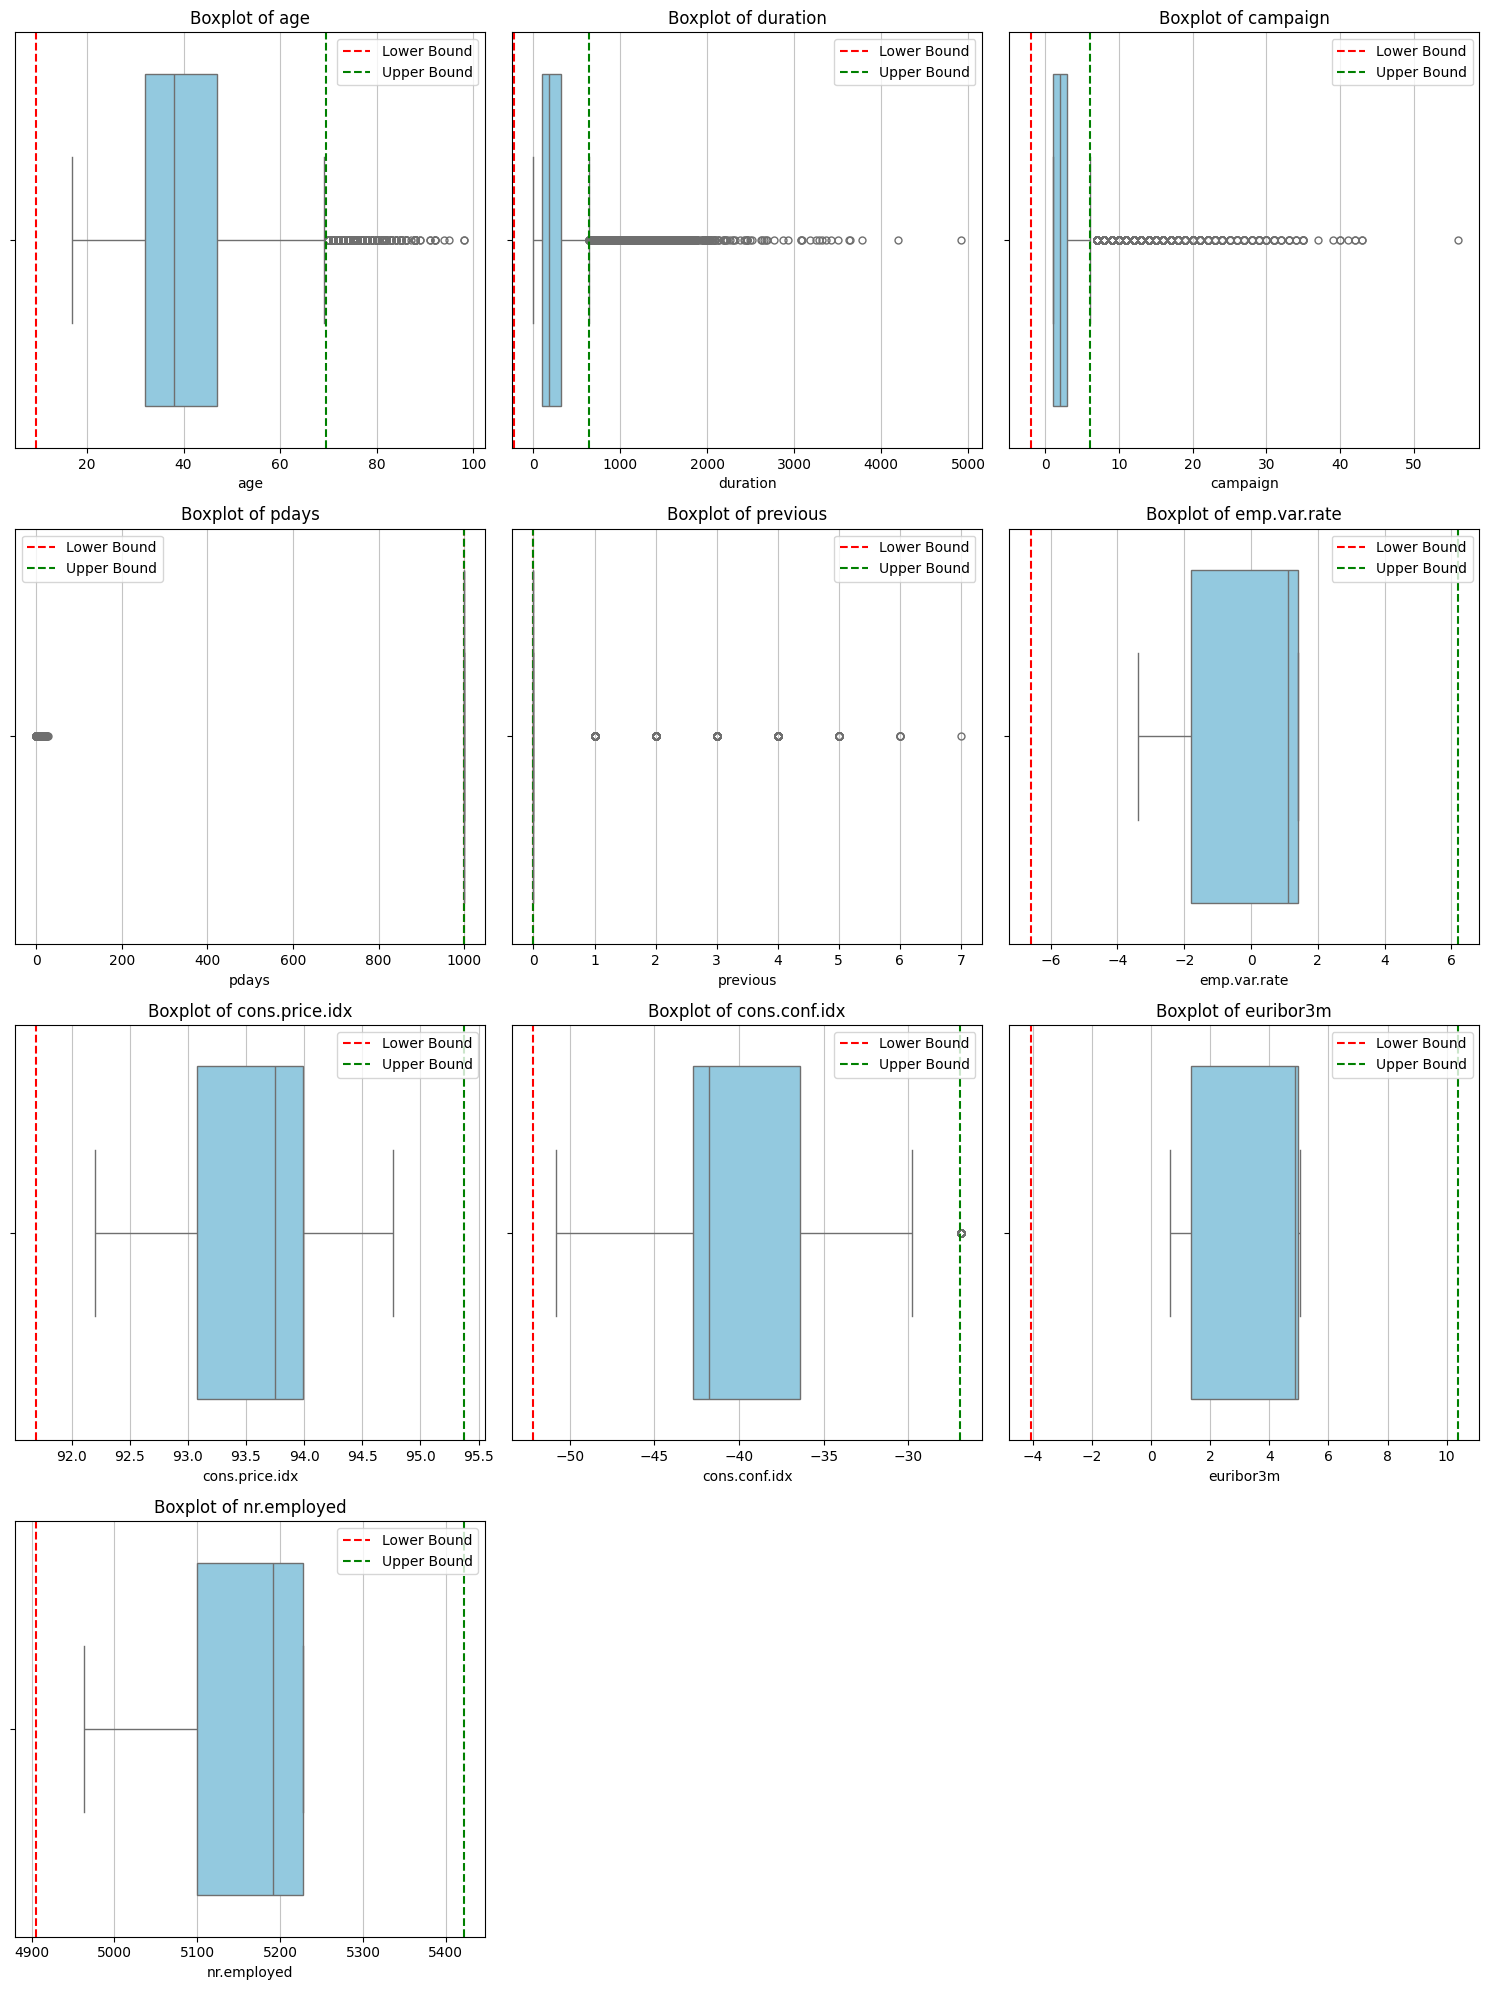

In [189]:
# Calculating the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_cols)
num_rows = int(np.ceil(num_columns / 3))

# Creating a figure and axes array for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plotting boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    ax = axes[i]

    # Calculating IQR and bounds
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plotting the boxplot
    sns.boxplot(x=data[column], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5), ax=ax)
    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    ax.legend()
    ax.grid(axis='x', alpha=0.75)


for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### **Summary of the Entire Dataset**

In [190]:
# Analyzing each column individually
def analyze_columns(data):
    # Create a list to store summary rows
    summary_rows = []

    for col in data.columns:
        unique_values = data[col].unique()
        n_unique = len(unique_values)
        missing_count = data[col].isnull().sum()
        examples = unique_values[:5] if n_unique > 5 else unique_values

        # Append a dictionary to the list
        summary_rows.append({
            "Column": col,
            "Data Type": data[col].dtype,
            "Unique Values": n_unique,
            "Missing Values": missing_count,
            "Examples": examples
        })

    # Combine rows into a DataFrame
    summary = pd.DataFrame(summary_rows)
    return summary

# Perform column-wise analysis
column_summary = analyze_columns(data)

# Analyze individual columns
print("Summary of the entire dataset:")
for col in data.columns:
    print(f"\nAnalyzing Column: {col}")
    print(f"Data Type: {data[col].dtype}")
    print(f"Unique Values: {data[col].nunique()}")
    print(f"Missing Values: {data[col].isnull().sum()}")
    print(f"Top 5 Most Frequent Values:\n{data[col].value_counts().head()}")

Summary of the entire dataset:

Analyzing Column: age
Data Type: int64
Unique Values: 78
Missing Values: 0
Top 5 Most Frequent Values:
age
31    1947
32    1846
33    1833
36    1780
35    1759
Name: count, dtype: int64

Analyzing Column: job
Data Type: object
Unique Values: 12
Missing Values: 0
Top 5 Most Frequent Values:
job
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: count, dtype: int64

Analyzing Column: marital
Data Type: object
Unique Values: 4
Missing Values: 0
Top 5 Most Frequent Values:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Analyzing Column: education
Data Type: object
Unique Values: 8
Missing Values: 0
Top 5 Most Frequent Values:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: count, dtype: int64

Analyzing Column: default
Data Typ

# **Data Preprocessing**

### **Cleaning the dataset**

In [191]:
# Step 1: Removing whitespaces from object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [192]:
# Step 2: Removing unnecessary full stops(".") from the 'job' column
data['job'] = data['job'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)

In [193]:
# Step 3: Removing duplicates values
print(f"Initial dataset shape: {data.shape}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Initial dataset shape: (41188, 21)
Shape after removing duplicates: (41176, 21)


### **Handling Missing Values**

**Handling 'unknown' (missing) values in the categorical columns**

**Replacing all the unknown values with 'NaN' for impuation**

In [194]:
# step 4: Handling "unknown" values in the categorical columns

# Replacing the all the missing values in the categorical columns with NaN for impuation
for col in categorical_cols:
    data[col] = data[col].replace('unknown', np.nan)

**Checking for any 'unknown' values which is left behind when replacing with 'NaN'**

In [195]:
# Verifying the changes and checking for the columns which contain 'unknown' values
unknown_found = False

# Iterating through all columns to check for 'unknown' values
for col in data.columns:
    unknown_count = data[col].astype(str).str.contains('unknown', case=False, na=False).sum()
    if unknown_count > 0:
        if not unknown_found:
            print("\nColumns with 'unknown' values and their counts:\n")  # Print header only once
        unknown_found = True
        print(f"{col} : {unknown_count}")

if not unknown_found:
    print("\nNo column with 'unknown' values found.")



No column with 'unknown' values found.


**Handling missing values in the numerical columns**

In [196]:
# step 5: Checking for missing values in numerical columns
missing_info = {}

for col in numerical_cols:
    missing_count = data[col].isna().sum()
    if missing_count > 0:
        missing_info[col] = missing_count
        # Replacing the missing values in the numerical columns with the median
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)

if missing_info:
    print("Missing values found in the following numerical columns:")
    for col, count in missing_info.items():
        print(f"Column '{col}': {count} missing value(s).")
else:
    print("No missing values found in the numerical columns.")

No missing values found in the numerical columns.


## **Data Encoding**

**All categorical columns are encoded using label encoding. This method is particularly useful in this context as it enables the use of the K-NN Imputer to efficiently handle and predict missing values within the categorical data.**

In [197]:
# Step 6: Encoding categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Display the first few rows of the categorical columns
print(data[categorical_cols].head())

   job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        1        1     1        1      6   
1    8        1          3        0        1     1        1      6   
2    8        1          3        1        2     1        1      6   
3    0        1          1        1        1     1        1      6   
4    8        1          3        1        1     2        1      6   

   day_of_week  poutcome  y  
0            1         1  0  
1            1         1  0  
2            1         1  0  
3            1         1  0  
4            1         1  0  


In [198]:
# Step 7: Handling the 'duration' column

# Calculating the correaltion between the 'duraion' and the 'y' target variable
correlation_duration = data['duration'].corr(data['y'])
print("Correlation between 'duration' and 'y':", correlation_duration)

Correlation between 'duration' and 'y': 0.40529726126852583


**Excluding the 'duration' feature to avoid data leakage, since the correlation between the 'duration' and 'y' is so high, it will make the predictions of the model less accurate.**

In [199]:
# Excluding the 'duration' feature for realistic predictive modeling
data = data.drop(columns=['duration'])

**Excluding the "default" column since one case (" no ") dominates more than 90% of that column**

In [200]:
# Step 8: Handling the 'default' column

# Excluding the 'default' column since more than 90% of the data in the column is dominated by the value "no"
data = data.drop(columns=['default'])

### **Handling the Outliers**

In [201]:
# Step 9: Handling Outliers

# Function to handle outliers by capping or replacing
def handle_outliers(data, method='cap'):
    for column in numerical_cols:
        if column == 'age':
            lower_bound, upper_bound = 9.50, 69.50
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

        elif column == 'campaign':
            lower_bound, upper_bound = 0, 6.00
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

        elif column == 'cons.conf.idx':
            lower_bound, upper_bound = -52.15, -26.95
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

        # No outlier handling needed for these columns
        elif column in ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']:
            continue

    return data

# Applying the function to handle outliers
data_cleaned = handle_outliers(data.copy(), method='cap')

# Displaying the cleaned dataset
print(data_cleaned.head())

    age  job  marital  education  housing  loan  contact  month  day_of_week  \
0  56.0    3        1          0        1     1        1      6            1   
1  57.0    8        1          3        1     1        1      6            1   
2  37.0    8        1          3        2     1        1      6            1   
3  40.0    0        1          1        1     1        1      6            1   
4  56.0    8        1          3        1     2        1      6            1   

   campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0       1.0    999         0         1           1.1          93.994   
1       1.0    999         0         1           1.1          93.994   
2       1.0    999         0         1           1.1          93.994   
3       1.0    999         0         1           1.1          93.994   
4       1.0    999         0         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  
0          -36.4      4.857       5191.0

In [137]:
# Step 10: Scaling numerical features
numerical_cols = [
    'age', 'campaign', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])

In [202]:
# Step 11: Handling the 'pdays' and the 'previous' columns

# Correlation between the 'pdays' and the 'previous' columns
correlation_pdays_previous = data['pdays'].corr(data['previous'])
print("Correlation between 'pdays' and 'previous':", correlation_pdays_previous)

Correlation between 'pdays' and 'previous': -0.5875076785088118


Creating the contact_score feature by combining pdays (days since last contact) and previous (number of previous contacts) is an effective way to handle dominating values in these columns. The value 999 in pdays (no prior contact) and 0 in previous can skew the dataset. These columns also show a moderate negative correlation of -0.5875076785088118.

This method manages dominating values while preserving the correlation. By merging both columns into contact_score, it simplifies the data, reduces imbalance, and improves model performance.

In [203]:
# Creating an additional column by combing the columns 'pdays' and 'previous'
data['contact_score'] = data.apply(lambda row: (1 / (row['pdays'] + 1)) * row['previous'] if row['pdays'] != 999 else 0, axis=1)

**Excluding the 'pdays' and the 'previous' features since an additional feature called the 'contact_score' is created by combining them**

In [204]:
# Excluding the 'pdays' and the 'previous' columns
data = data.drop(columns=['pdays', 'previous'])

In [205]:
# Step 12: Handling multicollinearity in the dataset

# Calculating the correlation of the 'emp.var.rate', 'nr.employed' and 'euribo3m'
print(data[['emp.var.rate', 'nr.employed', 'euribor3m']].corr())

              emp.var.rate  nr.employed  euribor3m
emp.var.rate      1.000000     0.906949   0.972244
nr.employed       0.906949     1.000000   0.945146
euribor3m         0.972244     0.945146   1.000000


**Since the columns 'emp.var.rate,' 'nr.employed,' and 'euribor3m' show very high positive correlations (>0.9) with each other, this suggests potential redundancy among these variables. Including all of them in a model might not add significant value and could lead to multicollinearity issues within the dataset. To address this, PCA is used to reduce the dimensionality of the dataset and efficiently manage these columns.**

In [207]:
# Using PCA to reduce the domensionality of the dataset to efficiently handle the columns with high correlation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

In [208]:
# Displaying the PCA result
print(pca_df.head())

        PC1       PC2
0  1.279043  1.699706
1  1.279260  1.765741
2  1.274905  0.445041
3  1.275559  0.643146
4  1.279043  1.699706


In [209]:
# Step 13: Splitting features and target
X = data.drop(columns=['y'])
y = data['y']

In [210]:
# Step 14: Applying KNNImputer to handle the missing values
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

# Display the imputed missing values
print(imputed_data)

        age   job  marital  education  housing  loan  contact  month  \
0      56.0   3.0      1.0        0.0      1.0   1.0      1.0    6.0   
1      57.0   8.0      1.0        3.0      1.0   1.0      1.0    6.0   
2      37.0   8.0      1.0        3.0      2.0   1.0      1.0    6.0   
3      40.0   0.0      1.0        1.0      1.0   1.0      1.0    6.0   
4      56.0   8.0      1.0        3.0      1.0   2.0      1.0    6.0   
...     ...   ...      ...        ...      ...   ...      ...    ...   
41171  73.0   6.0      1.0        6.0      2.0   1.0      0.0    7.0   
41172  46.0   1.0      1.0        6.0      1.0   1.0      0.0    7.0   
41173  56.0   6.0      1.0        7.0      2.0   1.0      0.0    7.0   
41174  44.0  10.0      1.0        6.0      1.0   1.0      0.0    7.0   
41175  74.0   6.0      1.0        6.0      2.0   1.0      0.0    7.0   

       day_of_week  campaign  poutcome  emp.var.rate  cons.price.idx  \
0              1.0       1.0       1.0           1.1          9

# **Building the Models with Imbalanced Dataset**

In [146]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Analyzing the distribution of the y train dataset
y_train.value_counts(normalize=True)

,proportion
y,
0,0.888646
1,0.111354


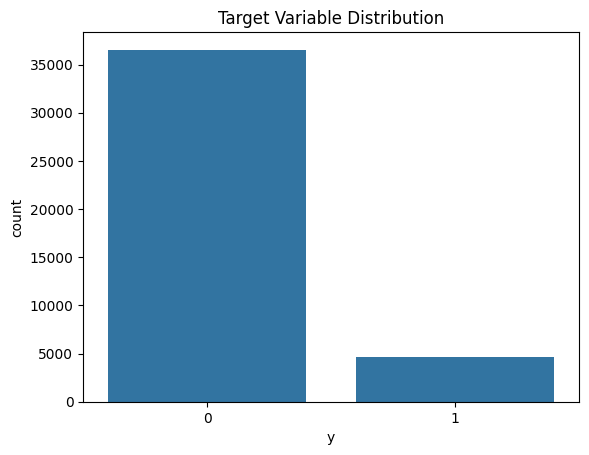

In [148]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='y')
plt.title('Target Variable Distribution')
plt.show()

In [149]:
# Displaying the dataset shape
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (32940, 17)
Shape of y_train: (32940,)


In [150]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   housing         41176 non-null  int64  
 5   loan            41176 non-null  int64  
 6   contact         41176 non-null  int64  
 7   month           41176 non-null  int64  
 8   day_of_week     41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  poutcome        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
 16  y               41176 non-null  int64  
 17  contact_score  

# **Building the Models**

In [151]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model based on Random Forest**

In [152]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier

# Computing class weights
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()),
                 1: len(y_train) / (2 * (y_train == 1).sum())}

In [153]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [154]:
# Accuracy and Classification Report for Random Forest
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 0.8882952889752307

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.55      0.28      0.37       971

    accuracy                           0.89      8236
   macro avg       0.73      0.63      0.66      8236
weighted avg       0.87      0.89      0.87      8236



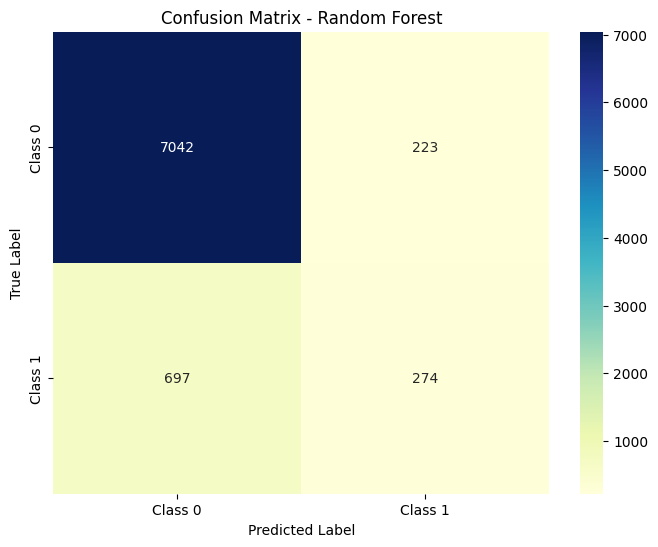

In [155]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

# **Feature Importance of the Random Forest Model**

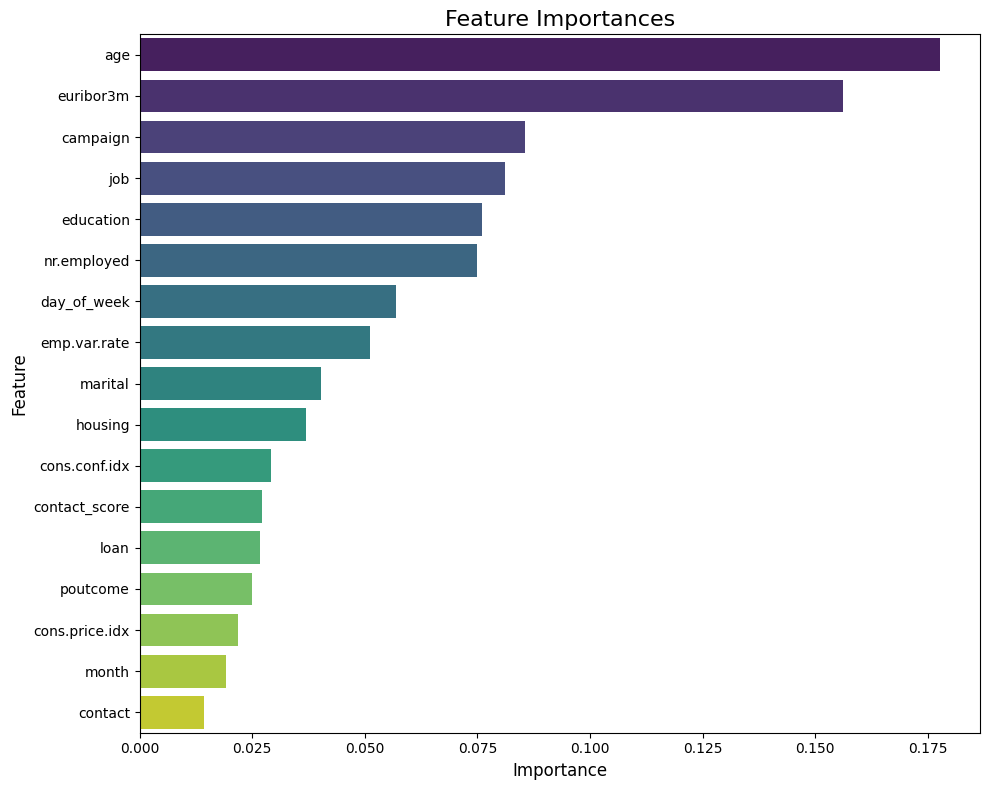

In [156]:
# Extracting the feature imprtance and arranging them in the descending order
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns[indices]

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=features, palette='viridis')

# Addding labels and title
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Displaying the plot
plt.show()

## **Model based on Neural Networks**

In [157]:
# Initialize Neural Network with adjusted class weights
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, solver='adam')

# Manually apply class weights
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights based on the target variable
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [158]:
# Neural Network Predictions
y_pred_nn = nn_model.predict(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)[:, 1]

In [159]:
# Accuracy and Classification Report for Neural Network
print("Neural Network Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Model Evaluation:
Accuracy: 0.8936376881981545

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.70      0.17      0.28       971

    accuracy                           0.89      8236
   macro avg       0.80      0.58      0.61      8236
weighted avg       0.88      0.89      0.86      8236



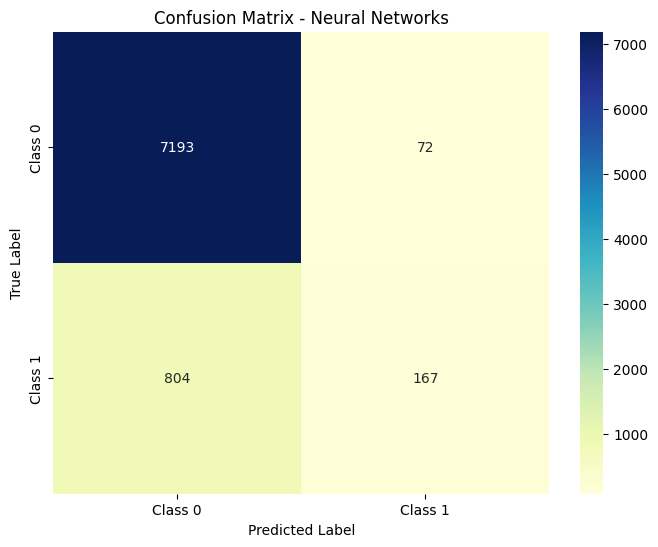

In [160]:
# Compute the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Neural Networks")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

# **Feature Importance of the Neural Network Model**

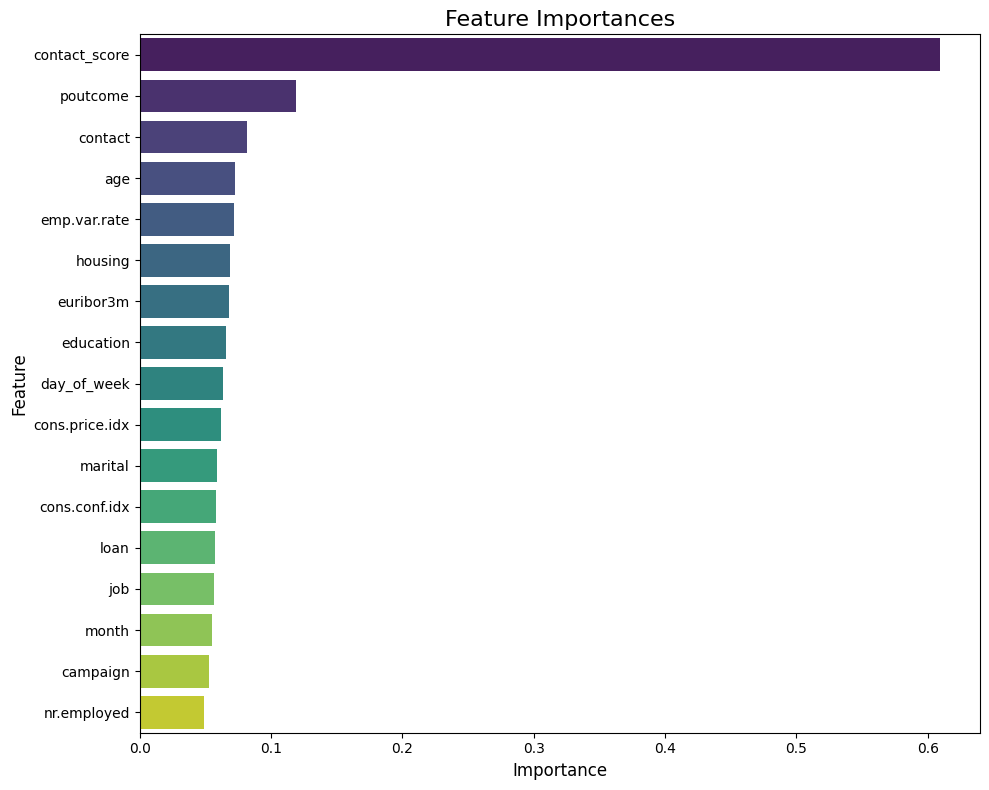

In [161]:
# Aggregating feature importances
importances = np.mean(np.abs(nn_model.coefs_[0]), axis=1)

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
features = X_train.columns[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=features, palette='viridis')

# Add labels and title
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


## **Comparison of the Random Forest and the Neural Network Models**

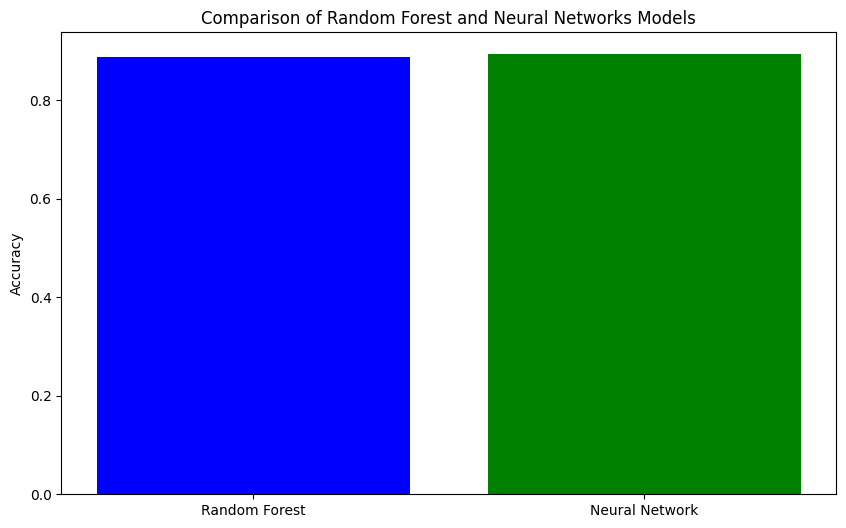

In [162]:
# Plotting the comparison of Random Forest and Neural Networks Models
plt.figure(figsize=(10, 6))
plt.bar(['Random Forest', 'Neural Network'], [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nn)], color=['blue', 'green'])
plt.title('Comparison of Random Forest and Neural Networks Models')
plt.ylabel('Accuracy')
plt.show()

# **ROC-AUC Score and ROC Curve**

In [163]:
# ROC-AUC Scores
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Neural Network ROC-AUC: {roc_auc_nn}")

Random Forest ROC-AUC: 0.7746010066179352
Neural Network ROC-AUC: 0.7695908816093413


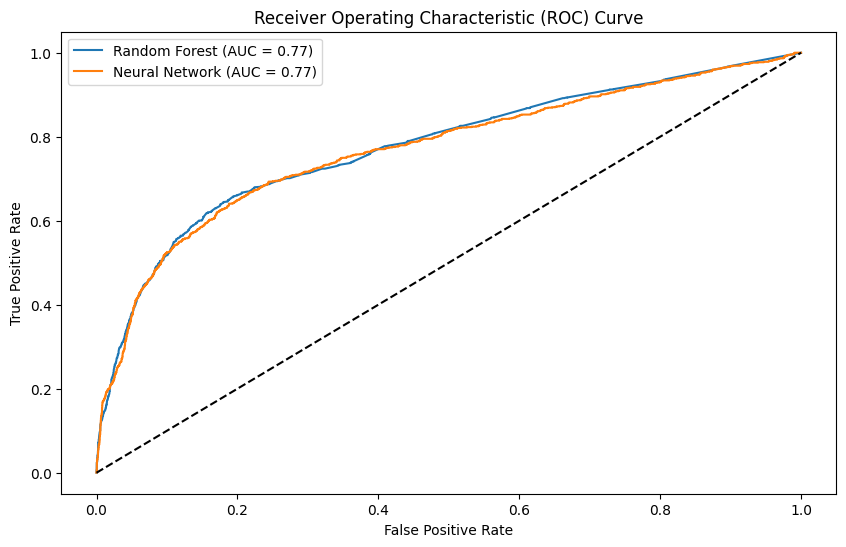

In [164]:
# Plotting ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**This shows when the dataset is imbalanced, the overall performance of the models is highly impacted where the models only performs well for the majority class and the minority class is predicted inefficiently as shown in the accuracy report generated (precision, F1-Score). Furthermore this shows the requirement of the handling imbalancing values before traning the models to avoid these imbalance in the majority and the minority class prediction where it is highly considered in the real world scenarios. Since this the dataset imbalanced should be handled and trained the model like shown in below.**

# **Building the Models with Balanced Dataset**

In [211]:
# Displaying the distribution of the 'y' variable
y.value_counts(normalize=True)

,proportion
y,
0,0.887337
1,0.112663


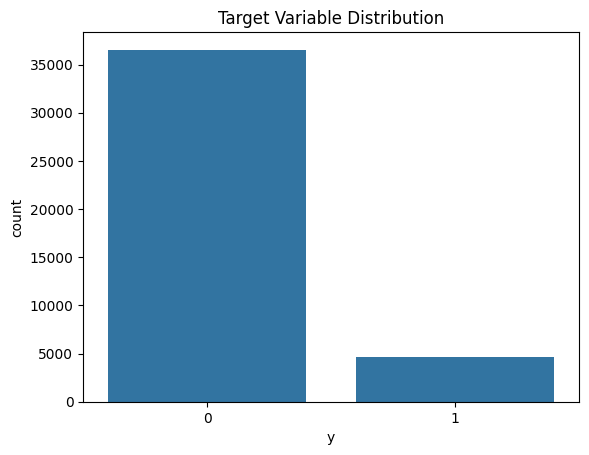

In [212]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='y')
plt.title('Target Variable Distribution')
plt.show()

In [213]:
# Displaying the dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   housing         41176 non-null  int64  
 5   loan            41176 non-null  int64  
 6   contact         41176 non-null  int64  
 7   month           41176 non-null  int64  
 8   day_of_week     41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  poutcome        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
 16  y               41176 non-null  int64  
 17  contact_score  

## **Balancing the Target Variable**

In [214]:
# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (41176, 17)
Resampled dataset size: (73074, 17)


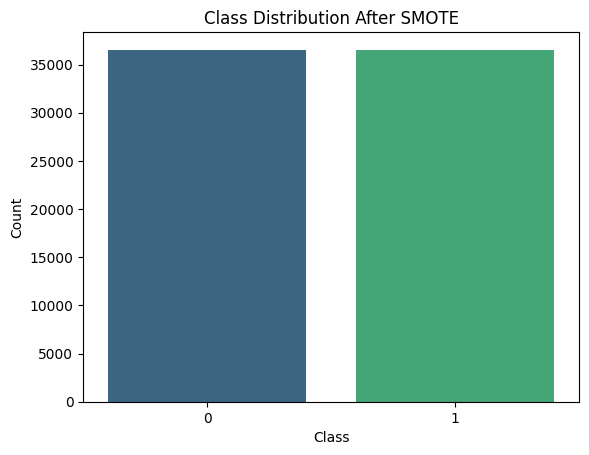

In [215]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [216]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (73074, 17)
Shape of y_resampled: (73074,)


In [217]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [218]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [219]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   housing         41176 non-null  int64  
 5   loan            41176 non-null  int64  
 6   contact         41176 non-null  int64  
 7   month           41176 non-null  int64  
 8   day_of_week     41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  poutcome        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
 16  y               41176 non-null  int64  
 17  contact_score  

# **Building the Models**

## **Model based on Random Forest**

In [220]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier

# Computing class weights
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()),
                 1: len(y_train) / (2 * (y_train == 1).sum())}

In [221]:
# Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.91823469 0.92259665 0.91746493 0.9185768  0.92241895]
Mean Cross-Validation Accuracy: 0.9198584060717542


In [222]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [223]:
# Accuracy and Classification Report for Random Forest
print("Random Forest Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation
Accuracy: 0.9268559698939446

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7308
           1       0.93      0.93      0.93      7307

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615



In [225]:
# Checking overfitting for Random Forest
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
difference_rf = train_accuracy_rf - test_accuracy_rf

print("Random Forest Overfitting Check:")
print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print(f"Difference (Train - Test): {difference_rf:.2f}")

Random Forest Overfitting Check:
Training Accuracy: 1.00
Test Accuracy: 0.93
Difference (Train - Test): 0.07


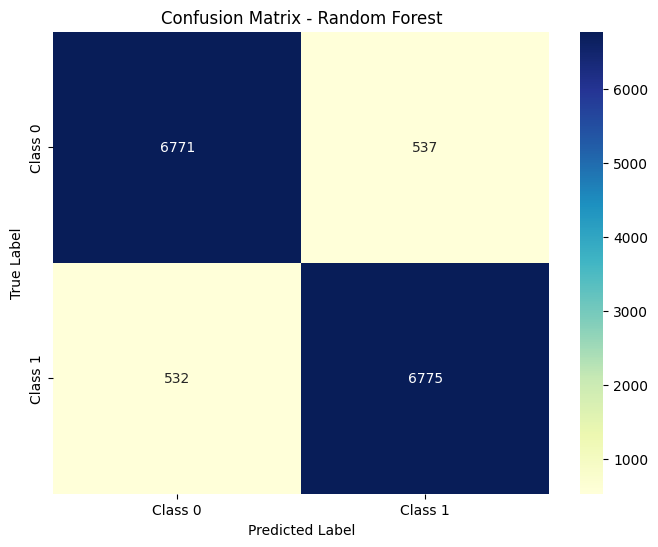

In [226]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

# **Feature Importance of the Random Forest Model**

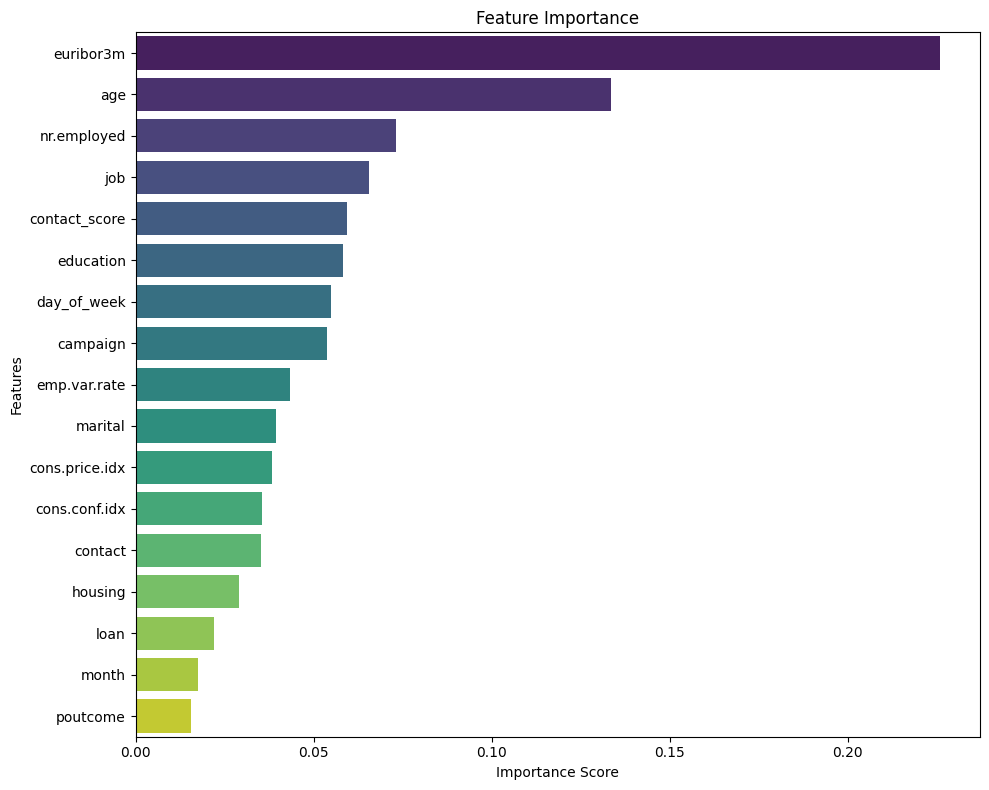

In [227]:
# Extracting the features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = X.columns[indices]

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=sorted_features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## **Model based on Neural Networks**

In [228]:
# Building the Neural Network model
model = Sequential()

# Input Layer
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 100)                 │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,201 (86.72 KB)

 Trainable params: 22,201 (86.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7508 - loss: 0.5062 - val_accuracy: 0.7752 - val_loss: 0.4721
Epoch 2/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7785 - loss: 0.4673 - val_accuracy: 0.7858 - val_loss: 0.4535
Epoch 3/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7824 - loss: 0.4531 - val_accuracy: 0.7888 - val_loss: 0.4477
Epoch 4/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7934 - loss: 0.4368 - val_accuracy: 0.7919 - val_loss: 0.4468
Epoch 5/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7988 - loss: 0.4288 - val_accuracy: 0.7966 - val_loss: 0.4328
Epoch 6/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8062 - loss: 0.4176 - val_accuracy: 0.8055 - val_loss: 0.4173
Epoch 7/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8110 - loss: 0.4066 - val_accuracy: 0.8086 - val_loss: 0.4174
Epoch 8/50
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8147 - loss: 0.4002 - 

In [229]:
# Neural Network Predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_nn = model.predict(X_test)

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [230]:
# Accuracy and Classification Report for Neural Network
print("\nNeural Network Classification Report:\n", classification_report(y_test, y_pred_nn))


Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      7308
           1       0.80      0.89      0.84      7307

    accuracy                           0.84     14615
   macro avg       0.84      0.84      0.84     14615
weighted avg       0.84      0.84      0.84     14615



In [233]:
# Evaluating the model on training and test datasets
train_loss, train_accuracy_nn = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy_nn = model.evaluate(X_test, y_test, verbose=0)

# Calculating the difference between train and test accuracy
difference_nn = train_accuracy_nn - test_accuracy_nn

# Displaying the overfitting check results
print("Neural Network Overfitting Check:")
print(f"Training Accuracy: {train_accuracy_nn:.2f}")
print(f"Test Accuracy: {test_accuracy_nn:.2f}")
print(f"Difference (Train - Test): {difference_nn:.2f}")


Neural Network Overfitting Check:
Training Accuracy: 0.89
Test Accuracy: 0.84
Difference (Train - Test): 0.06


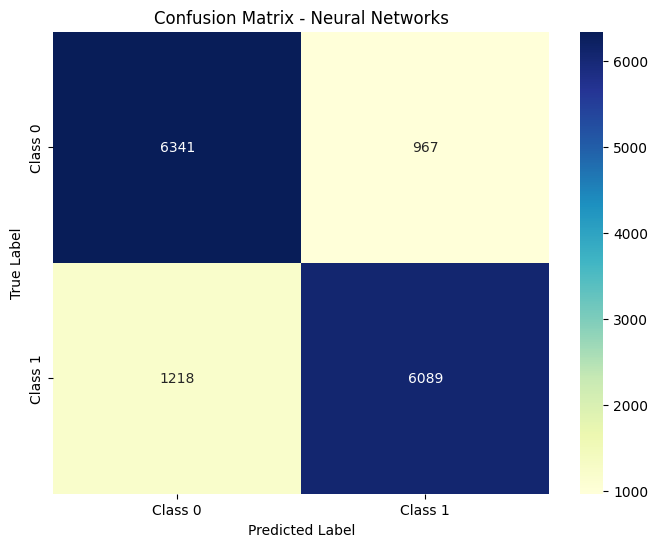

In [95]:
# Compute the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Neural Networks")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

# **Feature Importance of the Neural Network Model**

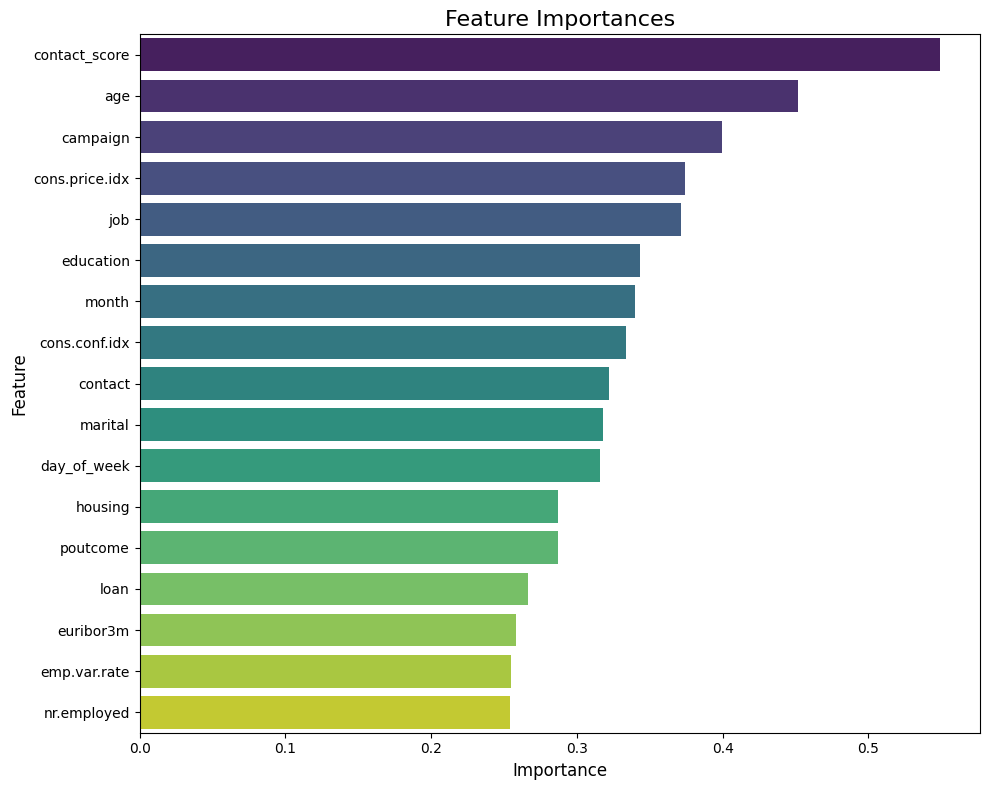

In [96]:
# Aggregating feature importances
importances = np.mean(np.abs(nn_model.coefs_[0]), axis=1)

# Sorting the features by importance
indices = np.argsort(importances)[::-1]
features = X.columns[indices]

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=features, palette='viridis')

# Add labels and title
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

## **Comparison of the Random Forest and the Neural Network Models**

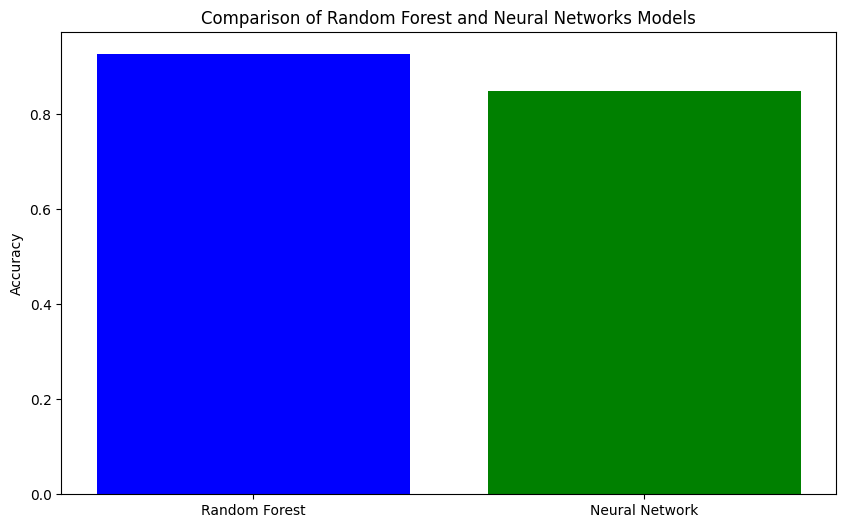

In [97]:
# Plotting the comparison of Random Forest and Neural Networks Models
plt.figure(figsize=(10, 6))
plt.bar(['Random Forest', 'Neural Network'], [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nn)], color=['blue', 'green'])
plt.title('Comparison of Random Forest and Neural Networks Models')
plt.ylabel('Accuracy')
plt.show()

# **ROC-AUC Score and ROC Curve**

In [98]:
# ROC-AUC Scores
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Neural Network ROC-AUC: {roc_auc_nn}")

Random Forest ROC-AUC: 0.9749543329536299
Neural Network ROC-AUC: 0.9236725863413545


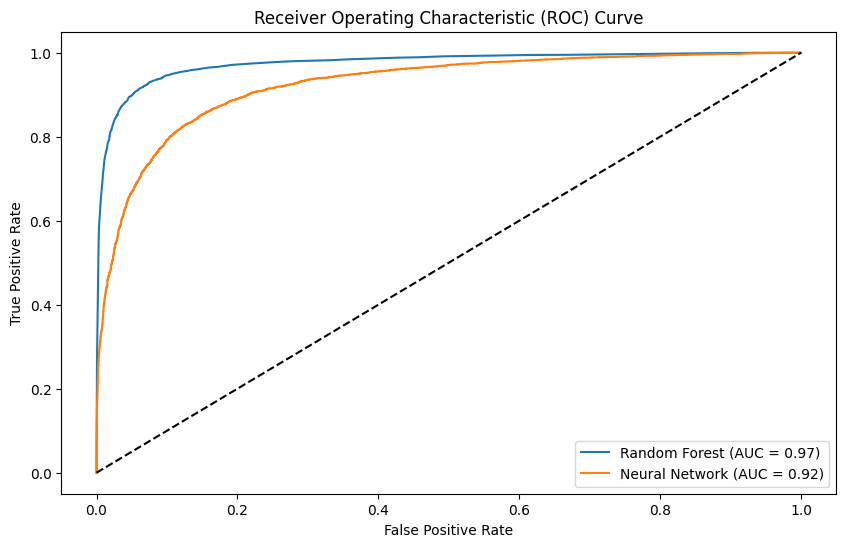

In [99]:
# Plotting ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()